<a href="https://colab.research.google.com/github/FadouaKhm/CSE590-Spring21-Intro-to-ML-DL/blob/main/%5BIntro_to_ML%5DSpam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 2 - Classification

### Load Training and Testing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Load training data
train_data = pd.read_csv('datasets/classification/spam_train.csv')
train_data.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,3009,0.07,0.0,0.07,0.0,0.00,0.00,0.00,0.46,0.69,...,0.142,0.175,0.032,0.000,0.021,0.0,3.007,60,791,0
1,798,0.00,0.0,0.74,0.0,1.85,0.37,0.37,0.00,0.00,...,0.000,0.264,0.000,0.000,0.000,0.0,2.492,12,172,1
2,4396,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.763,0.0,2.181,6,24,0
3,353,0.00,0.0,0.32,0.0,0.65,0.65,0.32,0.32,0.00,...,0.000,0.105,0.000,0.000,0.158,0.0,1.494,10,139,1
4,574,1.03,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.176,0.176,0.0,2.766,26,83,1


In [ ]:
#Load testing data
test_data = pd.read_csv('datasets/classification/spam_test.csv')
test_data.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,4175,0.00,0.00,1.57,0.0,0.22,0.22,0.00,0.00,0.0,...,0.0,0.091,0.0,0.045,0.000,0.0,1.276,16,97,0
1,2228,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,1.913,6,44,0
2,1803,0.00,1.03,0.00,0.0,1.03,0.00,1.03,0.51,0.0,...,0.0,0.257,0.0,0.600,0.429,0.0,1.447,4,55,1
3,2077,2.77,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.213,0.000,0.0,1.750,6,49,0
4,4390,0.00,0.00,1.72,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.303,0.0,0.910,0.000,0.0,2.171,9,76,0


In [ ]:
print('Training data shape =',train_data.shape,'\n')
print('Testing data shape =',test_data.shape)

Training data shape = (3450, 59) 

Testing data shape = (1151, 59)


In [ ]:
# Separate features and labels and remove row indices
#Traing data
X_train = train_data.iloc[:,1:-1].values
y_train = train_data.iloc[:,-1].values

#Testing data
X_test = test_data.iloc[:, 1:-1].values
y_test = test_data.iloc[:,-1].values

### Explore the data Data

In [ ]:
X_train

array([[7.000e-02, 0.000e+00, 7.000e-02, ..., 3.007e+00, 6.000e+01,
        7.910e+02],
       [0.000e+00, 0.000e+00, 7.400e-01, ..., 2.492e+00, 1.200e+01,
        1.720e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.181e+00, 6.000e+00,
        2.400e+01],
       ...,
       [0.000e+00, 7.100e-01, 3.500e-01, ..., 3.768e+00, 6.100e+01,
        2.600e+02],
       [5.400e-01, 1.300e-01, 3.800e-01, ..., 6.789e+00, 1.950e+02,
        3.327e+03],
       [0.000e+00, 0.000e+00, 2.120e+00, ..., 1.238e+00, 4.000e+00,
        2.600e+01]])

In [ ]:
y_train

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
X_train.shape, y_train.shape

((3450, 57), (3450,))

In [ ]:
y_train.shape

(3450,)

In [ ]:
X_test

array([[0.000e+00, 0.000e+00, 1.570e+00, ..., 1.276e+00, 1.600e+01,
        9.700e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.913e+00, 6.000e+00,
        4.400e+01],
       [0.000e+00, 1.030e+00, 0.000e+00, ..., 1.447e+00, 4.000e+00,
        5.500e+01],
       ...,
       [0.000e+00, 8.000e-01, 0.000e+00, ..., 3.115e+00, 1.900e+01,
        8.100e+01],
       [3.400e-01, 1.700e-01, 1.700e-01, ..., 4.792e+00, 3.800e+01,
        5.080e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.737e+00, 7.500e+01,
        2.280e+02]])

In [ ]:
y_test

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
X_test.shape, y_test.shape

((1625, 11), (1625,))

# a- KNN Binary Classifier

In [ ]:
## Build and fit KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [ ]:
## Compute score (R^2) on both training and testing sets
print('Training score: ',knn.score(X_train,y_train))
print('Testing score: ', knn.score(X_test,y_test))

Training score:  0.828695652173913
Testing score:  0.7706342311033884


In [ ]:
## Track the evolution of performances for different K
def evaluate_knn(range_K, X_train,y_train, X_test,y_test):
    train_score = []
    test_score = []
    for k in range(1,range_K):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        #R^2
        train_score.append(knn.score(X_train,y_train))
        test_score.append(knn.score(X_test,y_test))
    return train_score, test_score

In [ ]:
# Evaluate for different Ks
range_K = 30
train_score, test_score= evaluate_knn(range_K, X_train,y_train, X_test,y_test)

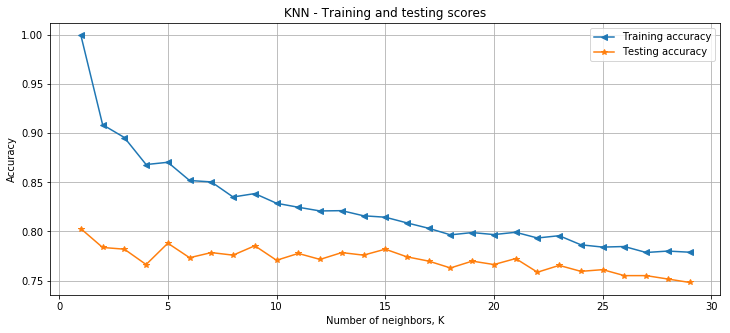

In [ ]:
# Plot accuracy evolution
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(range(1, range_K), train_score,'<-', label='Training accuracy')
plt.plot(range(1, range_K), test_score,'*-', label='Testing accuracy')
plt.title('KNN - Training and testing scores')
plt.xlabel('Number of neighbors, K')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

### Comments:
It can be noted that for K = 1, the model fits perfectly the training data by scoring 100%
accuracy. It was also able to generalize to the test data by scoring the best accuracy around 80%.
However, there is a risk that the model is overfitting the data for K=1.
As the value K of neighbours increases, the accuracy on the training set decreases relatively.

# b- Logistic Regression classifier

In [ ]:
#Build and fit a logistic regression model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
## Track the evolution of performances for different C
def evaluate_LR(range_C, X_train,y_train, X_test,y_test):
    train_score = []
    test_score = []
    for c in range_C:
        LR = LogisticRegression( C = c)
        LR.fit(X_train,y_train)
        #Accuracy
        train_score.append(LR.score(X_train,y_train))
        test_score.append(LR.score(X_test,y_test))
    return train_score, test_score

In [ ]:
# Evaluate for different Cs
range_C = np.arange(0.001, 5, 0.5)
train_score, test_score= evaluate_LR(range_C, X_train,y_train, X_test,y_test)

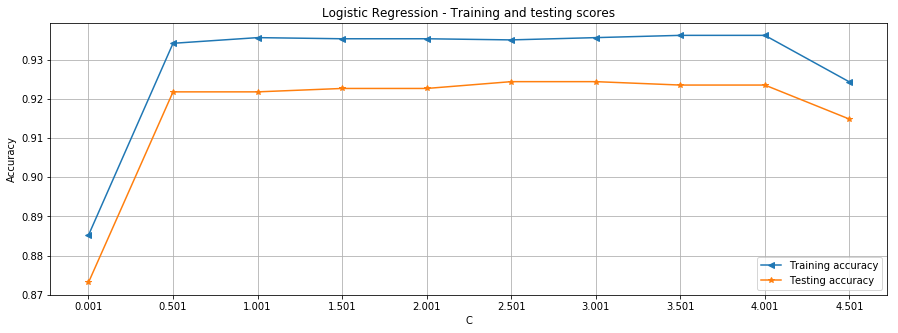

In [ ]:
# Plot accuracy evolution
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1, len(range_C)+1), train_score,'<-', label='Training accuracy')
plt.plot(range(1, len(range_C)+1), test_score,'*-', label='Testing accuracy')
plt.title('Logistic Regression - Training and testing scores')
plt.xticks([])
plt.xticks(range(1, len(range_C)+1),range_C.astype('float32'))
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

### Comments:
- For low C values, the regularization is strong, ==> low accuracies on both the training and testing sets. 
- For C=0.001, the model scores less than 89% on both the train set and the test set. 

- As C increases (the regularization decreases), the performance of the model increases. The accuracy on the train set keeps on increasing slowly with C, while the performance on the test set reaches its maximum for C between 2 and 3  then stays almost constant. 
- The optimal C value for the logistic regression classifier on this dataset can be between 2 and 3 where the model reaches 92.4% on the test set and around 93.6% on the train set.

# c- SVM

In [ ]:
# Build and train SVM model
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
## Track the evolution of performances for different C
def evaluate_SVM(range_C, X_train,y_train, X_test,y_test):
    train_score = []
    test_score = []
    for c in range_C:
        SVM = svm.SVC( C =c)
        SVM.fit(X_train,y_train)
        #Accuracy
        train_score.append(SVM.score(X_train,y_train))
        test_score.append(SVM.score(X_test,y_test))
    return train_score, test_score

In [ ]:
# Evaluate for different Cs
range_C = np.arange(0.001, 6, 0.5)
train_score, test_score= evaluate_SVM(range_C, X_train,y_train, X_test,y_test)

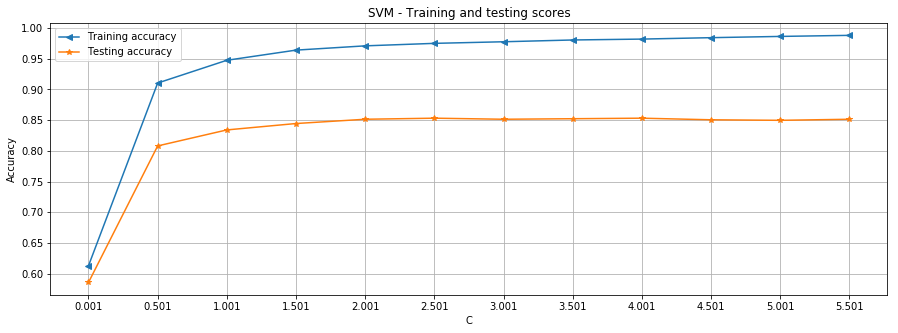

In [ ]:
# Plot accuracy evolution
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1, len(range_C)+1), train_score,'<-', label='Training accuracy')
plt.plot(range(1, len(range_C)+1), test_score,'*-', label='Testing accuracy')
plt.title('SVM - Training and testing scores')
plt.xticks([])
plt.xticks(range(1, len(range_C)+1),range_C.astype('float32'))
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

### Comments: 
- For low C values (strong regularization), the model reaches low accuracies on both the training and testing sets. For example, for C = 0.001, the model scores less than 65% on both the training and testing. Therefore, the model is underfitting the dataset. 

- As C increases (the regularization decreases), the performance of the model increases. The accuracy on the train set keeps on increasing with C, while the performance on the test set reaches its maximum for C=2.5 then stays almost constant. 

- There is a risk of overfitting for high C values (weak regularization).
